# Sensitivity  plotter
A simple notebook to plot some sensitivity curves from pre-defined concepts

To run this on Google Colab:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnGBaker/GWI-metrics/blob/main/Notebooks/sensitivityPlotter.ipynb)

### Some basic setup

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/JohnGBaker/GWI-metrics.git
    src='GWI-metrics/src/'
else:
    src='../src/'
import numpy as np
import matplotlib.pyplot as plt
import sys
import inspect
sys.path.append(src)
import metrics
import concepts
import constants
import background as bg

### make the plots

In [2]:
# list of concepts you want to make plots of
missions = (
    'LISACBE',
    'LISASciRDv1',
    'TwinLISA',
    'LISAGrande',
    'LISAU',
    'GoBIGLISA')

### First we plot without the galactic background

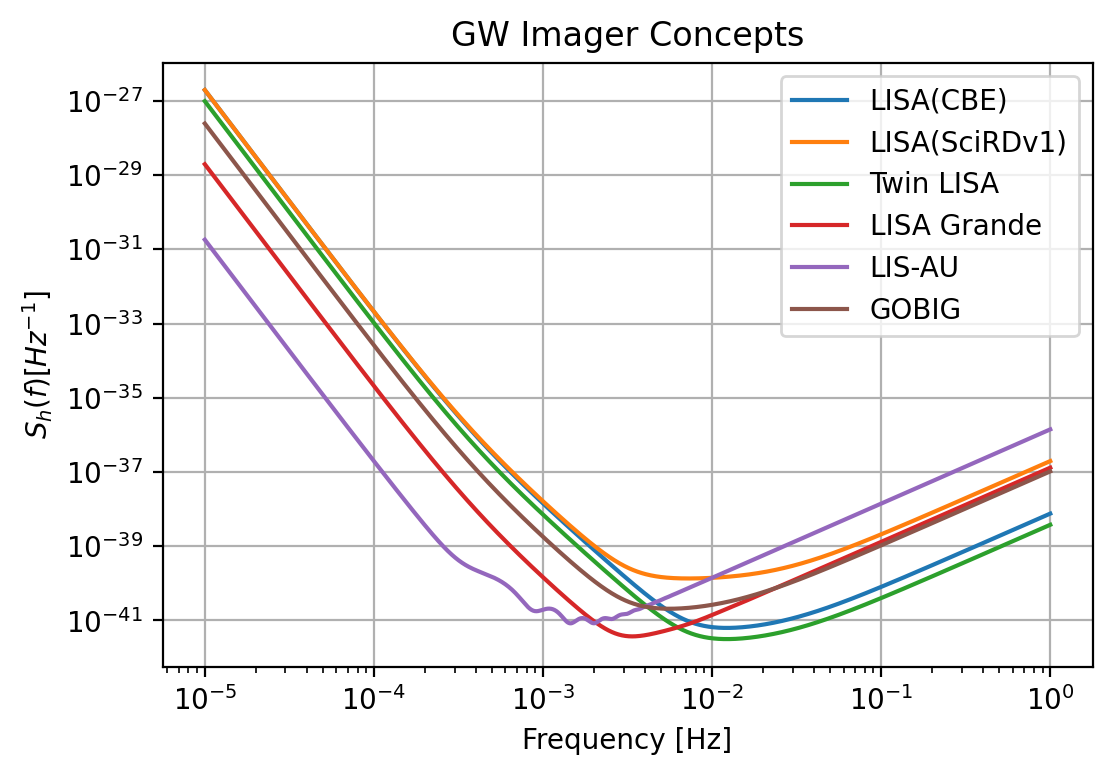

In [3]:
f = np.logspace(-5,0,1000)

fig = plt.figure(figsize=(6,4),dpi=200)
ax = fig.add_subplot(1,1,1)

for m in missions:
    model = eval('concepts.%s' % m)
    Sh = metrics.makeSensitivity(f,model)
    ax.plot(f,Sh,label=model.get('label'))
    
plt.title(r'GW Imager Concepts')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_h(f) [Hz^{-1}]$')
plt.legend()
ax.grid(True)
plt.savefig('../plots/GWImager_sensitivities.png')

### Now we plot with the galactic background

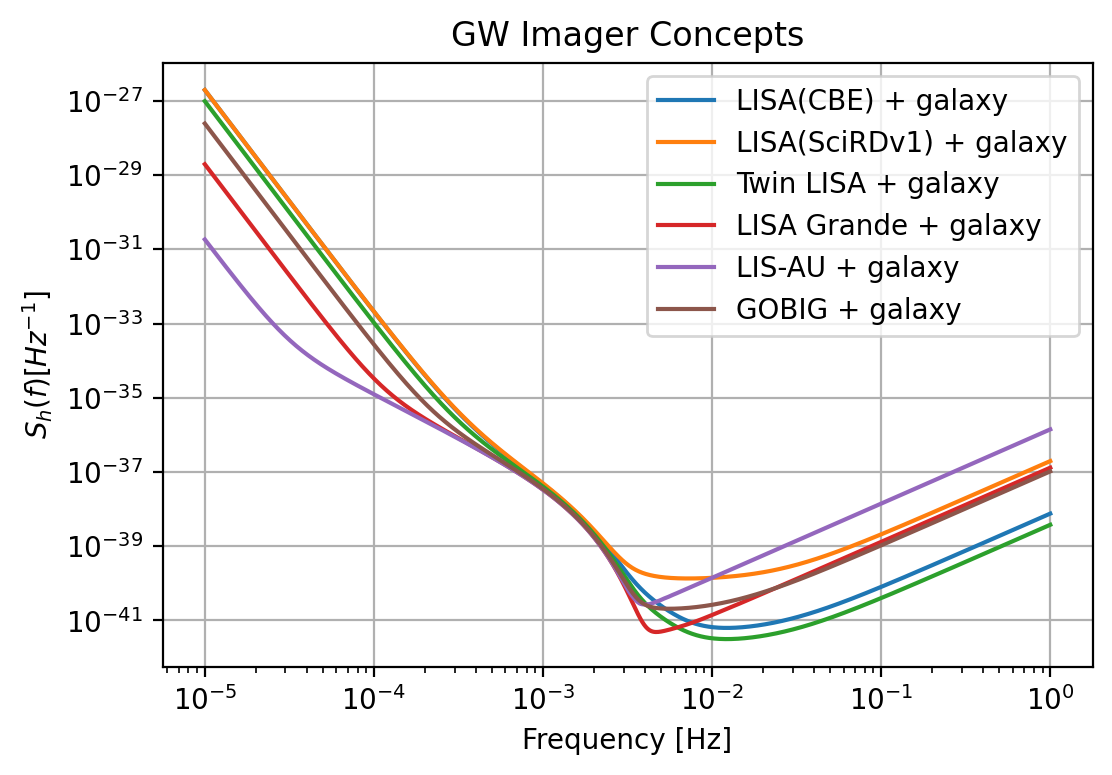

In [4]:
f = np.logspace(-5,0,1000)

fig = plt.figure(figsize=(6,4),dpi=200)
ax = fig.add_subplot(1,1,1)

for m in missions:
    model = eval('concepts.%s' % m)
    model = bg.add2model(model)
    Sh = metrics.makeSensitivity(f,model)
    ax.plot(f,Sh,label=model.get('label'))
    
plt.title(r'GW Imager Concepts')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_h(f) [Hz^{-1}]$')
plt.legend()
ax.grid(True)
plt.savefig('../plots/GWImager_sensitivities.png')